A filter with flat gain (0dB) to illustrate the algorithm: The filter steps are shown in blue. The result of applying the filter to 1 second of white noise in shown in grey.

* As the recordings' sample rate tops at 48 kHz, the highest filter band is 24 kHz. The lowest filter band is at 20Hz, which is a realistic lower limit for a recording.
* Equalization steps are spaced in 1 octave intervals (there are 10 octaves between 20Hz and 24kHz)
* All EQ steps for this dummy filter have a gain of 0dB
* A bass cutoff is applied at the end (-20dB) to remove frequencies which are lower than the lowest EQ band (20Hz).

In [2]:
# import the FFT scripts from local file FFT.R
source("FFT.R")

audiogram <- data.frame(
    c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0), 
    c(0.02, 0.044, 0.097, 0.213, 0.467, 1.027, 2.258, 4.965, 10.916, 24))
colnames(audiogram) <- c("SPL", "Frequency.in.kHz")

filter.table <- def_filter(audiogram)
filter.table

Frequency.in.kHz,Gain.in.dB
<dbl>,<dbl>
0.020,0
0.044,0
0.097,0
0.213,0
0.467,0
1.027,0
2.258,0
4.965,0
10.916,0


## Implement the filter
Implement a filter using the values from table above. Q is set to 0.7 (almost 2 octaves) for a smoother filter curve.

The generated command can be used to invoque sox by copy-pasting it in a Linux terminal.

In [4]:
# sox command
inputfile <- "data/whitenoise.wav"
outputfile <- "data/ft_dummy.wav"
Q <- 0.7
command <- sox_command(inputfile, outputfile, filter.table, Q)
command

[1] "sox data/whitenoise.wav data/ft_dummy.wav equalizer 20 0.7 0 equalizer 44 0.7 0 equalizer 97 0.7 0 equalizer 213 0.7 0 equalizer 467 0.7 0 equalizer 1027 0.7 0 equalizer 2258 0.7 0 equalizer 4965 0.7 0 equalizer 10916 0.7 0 equalizer 24000 0.7 0 bass -20"

## Testing the filter
The filter was tested by applying it to a file containing 1 second of white noise. The result can be checked visually in the following FFT plots.

Generate white noise and save it to file
`sox -n data/whitenoise.wav synth 1 whitenoise`

Warning message:
“Removed 20 rows containing missing values (geom_path).”


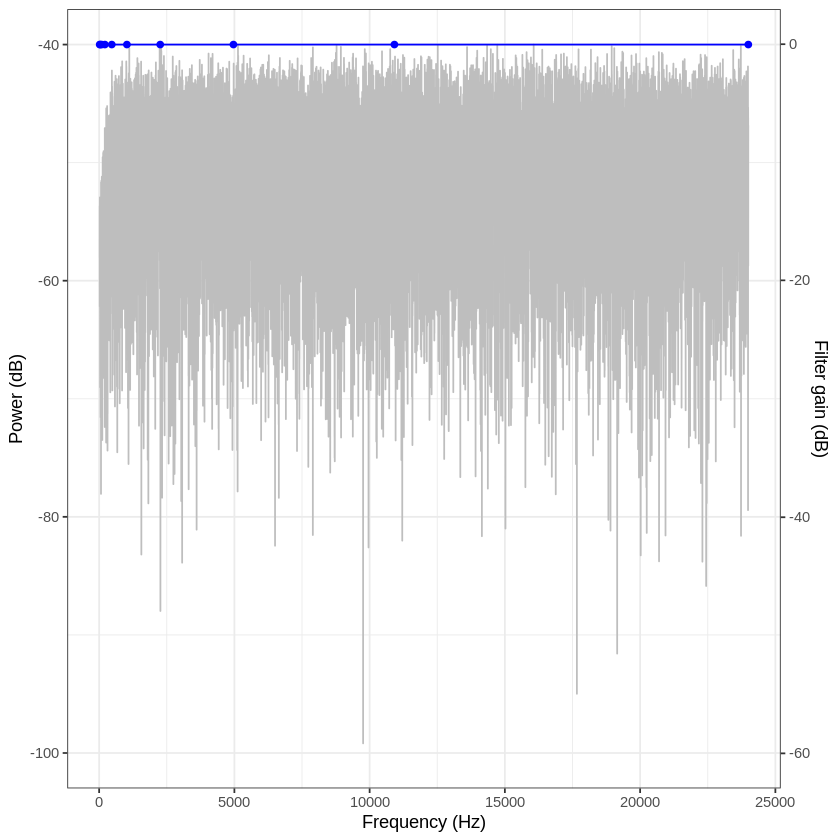

In [5]:
# compute FFT for the input file
sndObj <- readWave(outputfile)
fft <- comp_fft(sndObj)

# plot the filtered data and the filter values
plot_filter_fft(fft, filter.table)
